<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1acpzg9EPc-0AO2gFYSiPD_wqVQtyqeYT'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fire.csv')


1acpzg9EPc-0AO2gFYSiPD_wqVQtyqeYT


In [0]:
df=pd.read_csv('Fire.csv')

In [0]:
cor=df.corr()

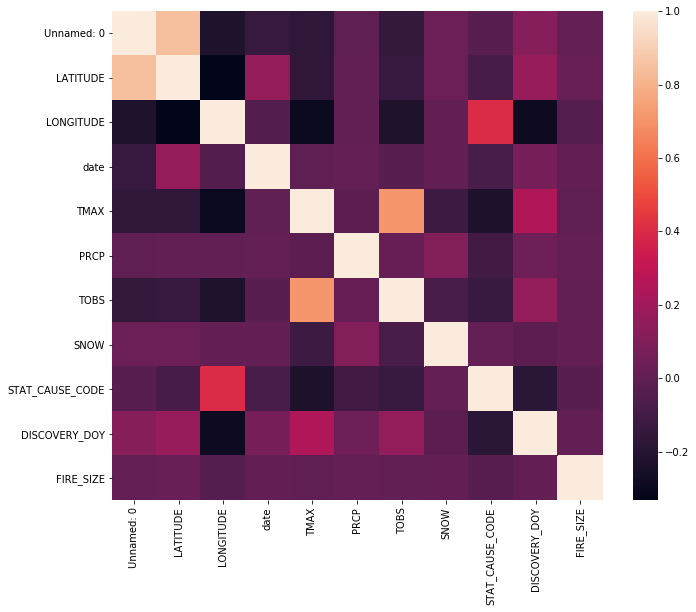

In [5]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cor)

In [6]:
df

,Unnamed: 0,LATITUDE,LONGITUDE,date,TMAX,PRCP,TOBS,SNOW,STAT_CAUSE_CODE,DISCOVERY_DOY,FIRE_SIZE
0,0,19.0,-155.0,19960110,205.500000,0.000000,139.000000,0.0,9.0,5,5.0
1,1,19.0,-155.0,19960609,211.000000,195.000000,183.000000,0.0,9.0,159,5.0
2,2,19.0,-155.0,19960612,233.500000,0.000000,172.000000,0.0,4.0,164,0.1
3,3,19.0,-155.0,19960903,227.500000,135.800000,194.000000,0.0,4.0,247,0.1
4,4,19.0,-155.0,19961217,172.000000,4.400000,111.000000,0.0,4.0,352,0.1
...,...,...,...,...,...,...,...,...,...,...,...
389982,25943,65.0,-148.0,19980701,278.900000,5.307692,188.142857,0.0,1.0,182,2.0
389983,25944,65.0,-148.0,19980831,153.222222,6.230769,89.000000,0.0,1.0,185,857.0
389984,25945,65.0,-147.0,19980506,150.200000,0.000000,62.500000,0.0,7.0,120,80.0
389985,25946,65.0,-147.0,19980613,182.750000,16.333333,127.750000,0.0,7.0,150,15.0


In [0]:
X=df.loc[:, df.columns != 'STAT_CAUSE_CODE']

In [0]:
y=df.STAT_CAUSE_CODE

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
dt = LogisticRegression()
dt.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = dt.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

30.334266695385498

In [13]:
dt = LogisticRegression()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)*100

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


30.334266695385498